<a href="https://colab.research.google.com/github/ehsanem/Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of classification problems
There are 3 types:

1. **Binary**: Two classes
2. **Multiclass**: More than 2 classes
3. **Multilable**: A single class has multiple lables




#Modelling process
The modelling process is as same as usual problems but loss function and metrics are different and depends on the problem type.

#Modelling steps

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Generate sample data

In [2]:
X, y = make_circles(1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

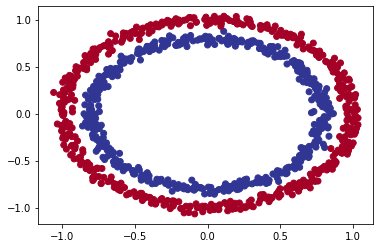

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

##Create decision boundary function

In [3]:
# create a function to plot decision boundary
def decision_boundary(model, X, y):
  #create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # OUPTPUT: xx and yy list with shape 100 elements and each element 100 values: 100x100
  
  #flatten  xx and yy list
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make pediction
  y_pred = model.predict(x_in)
  
  #finding maximum values in each element of y array to plot decision surface
  
  # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
  if model.output_shape[-1] > 1: 
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #plotting
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

##Create model 00

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose = 0)

###Plot model 00 performance
A model with two layers:
1. **Layer 1**: 10 units with Relu activation
2.  **Layer 2**: 1 units with Relu activation

doing binary classifcation...


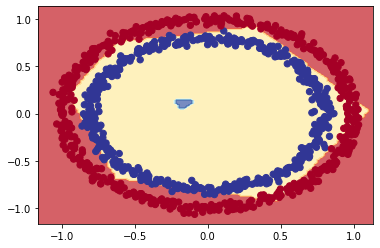

In [5]:
decision_boundary(model, X, y)

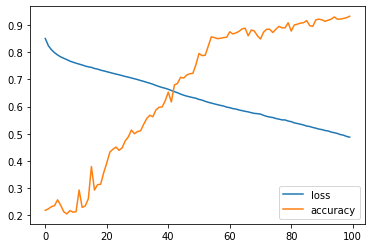

In [20]:
pd.DataFrame(history.history).plot()

##Create model 01

In [16]:
tf.random.set_seed(42)
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_01.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

history_01= model_01.fit(X_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4987
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5053
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5213
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.5320
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5293
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5413
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5507
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5680
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.5947
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6040
Epoch 11/

###Plot model 01 performance
A model with two layers:
1. **Layer 1**: 10 units with Relu activation
2. **Layer 2**: 10 units with Relu activation
3. **Layer 3**: 1 units with sigmoid activation

doing binary classifcation...


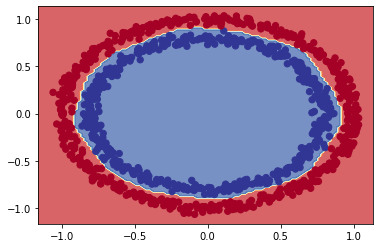

In [17]:
decision_boundary(model_01, X, y)

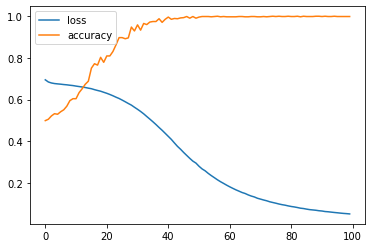

In [19]:
pd.DataFrame(history_01.history).plot()

#Find optimum learning rate
callbacks are a set of controllers during training:

Types of callbacks:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

We change LR based on a function (e.g. change LR based on exponential function) and plot LR and loss for all epochs

In [7]:
tf.random.set_seed(42)
model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_02.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_02= model_02.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler], verbose = 1)



Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.7129 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss:

##Plot learning rate, loss, accuracy vs. epoch

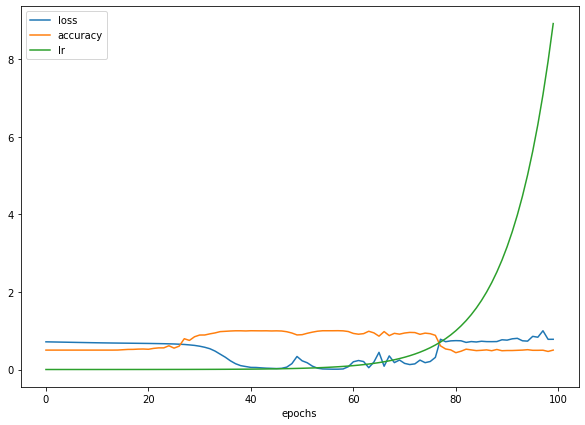

In [10]:
pd.DataFrame(history_02.history).plot(figsize=(10,7),xlabel='epochs')

In [ ]:
#closer look at loss and LR

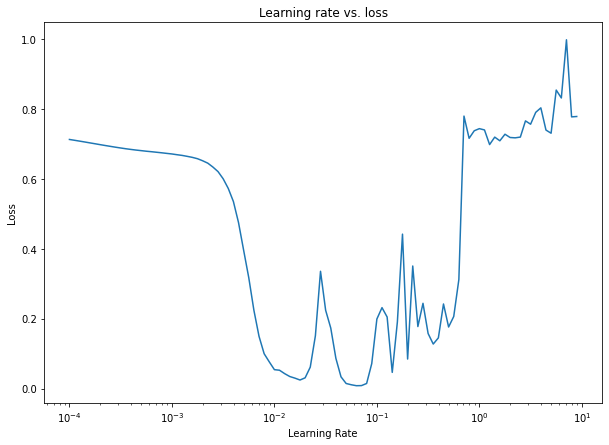

In [13]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_02.history["loss"]) #log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

##LR rule of thumb
Usually LR is equal to 1 times smaller than the lowest point of the LR.

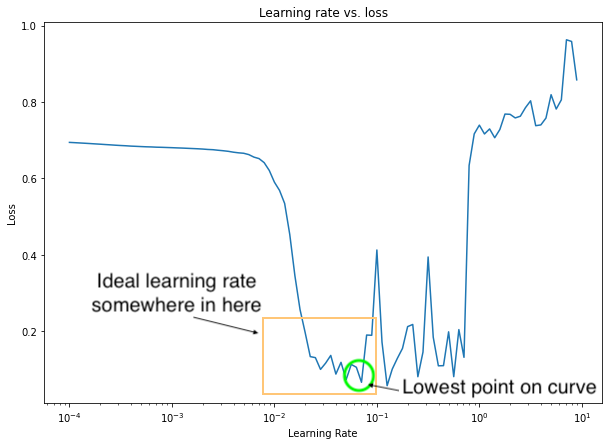